In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the DataSets
DataSet = pd.read_csv('Churn_Modelling.csv')

In [3]:
#show the dataset
DataSet.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#describe the dataset
DataSet.describe()
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Take a subset of the data to make plots clearer.
df = DataSet.loc[:,['CreditScore','Gender','Age','HasCrCard',
                         'Geography', 'NumOfProducts', 'IsActiveMember', 
                         'Tenure', 'Exited']]
corrmat = df.corr()

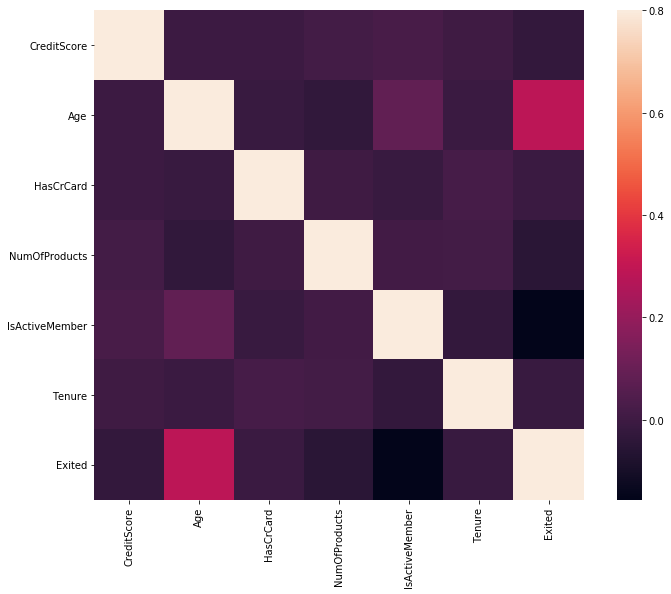

In [7]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Does not look like any variables are redundant


In [8]:
# Creating a data frame to hold our features.
features = pd.get_dummies(df['Geography'])
## REMEMBER ABOUT DUMMY VAR TRAP WHEN MODELLING. REMOVE 1 COLUMN

features['Adult_65plus'] = np.where(df['Age']>=65, 1, 0)
features['Adult_young'] = np.where(df['Age']<30, 1, 0)
features['Good_Credit'] = np.where(df['CreditScore']>=700, 1, 0)
features['Bad Credit'] = np.where(df['CreditScore']<= 500, 1, 0)
features['Gender'] = np.where(df['Gender']== 'Male', 1, 0)
features['CreditScore'] = df['CreditScore']
features['Age'] = df['Age']
features['Tenure'] = df['Tenure']
features['HasCrCard'] = df['HasCrCard']

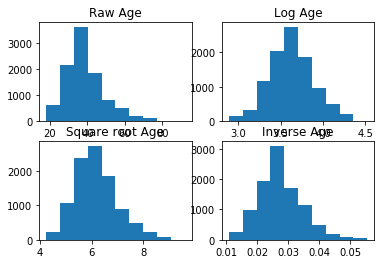

In [9]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['Age'].dropna())
plt.title('Raw Age')

fig.add_subplot(222)
plt.hist(np.log(df['Age'].dropna()))
plt.title('Log Age')

fig.add_subplot(223)
plt.hist(np.sqrt(df['Age'].dropna()))
plt.title('Square root Age')

ax3=fig.add_subplot(224)
plt.hist(1/df['Age'].dropna())
plt.title('Inverse Age')
plt.show()


Text(0.5,1,'Age CrScore')

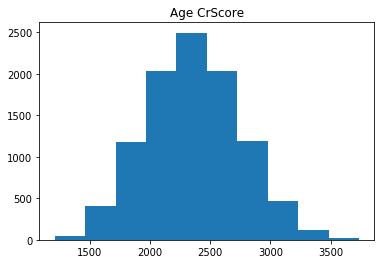

In [10]:
features['log_age'] = np.log(df['Age'])

# Create the interaction.
features['AgeCrScore'] = features['log_age'] * features['CreditScore']

# A plot of an interaction.
plt.hist(features['AgeCrScore'].dropna())
plt.title('Age CrScore')

In [12]:
plot = features.loc[:, 'Adult_65plus':'AgeCrScore']

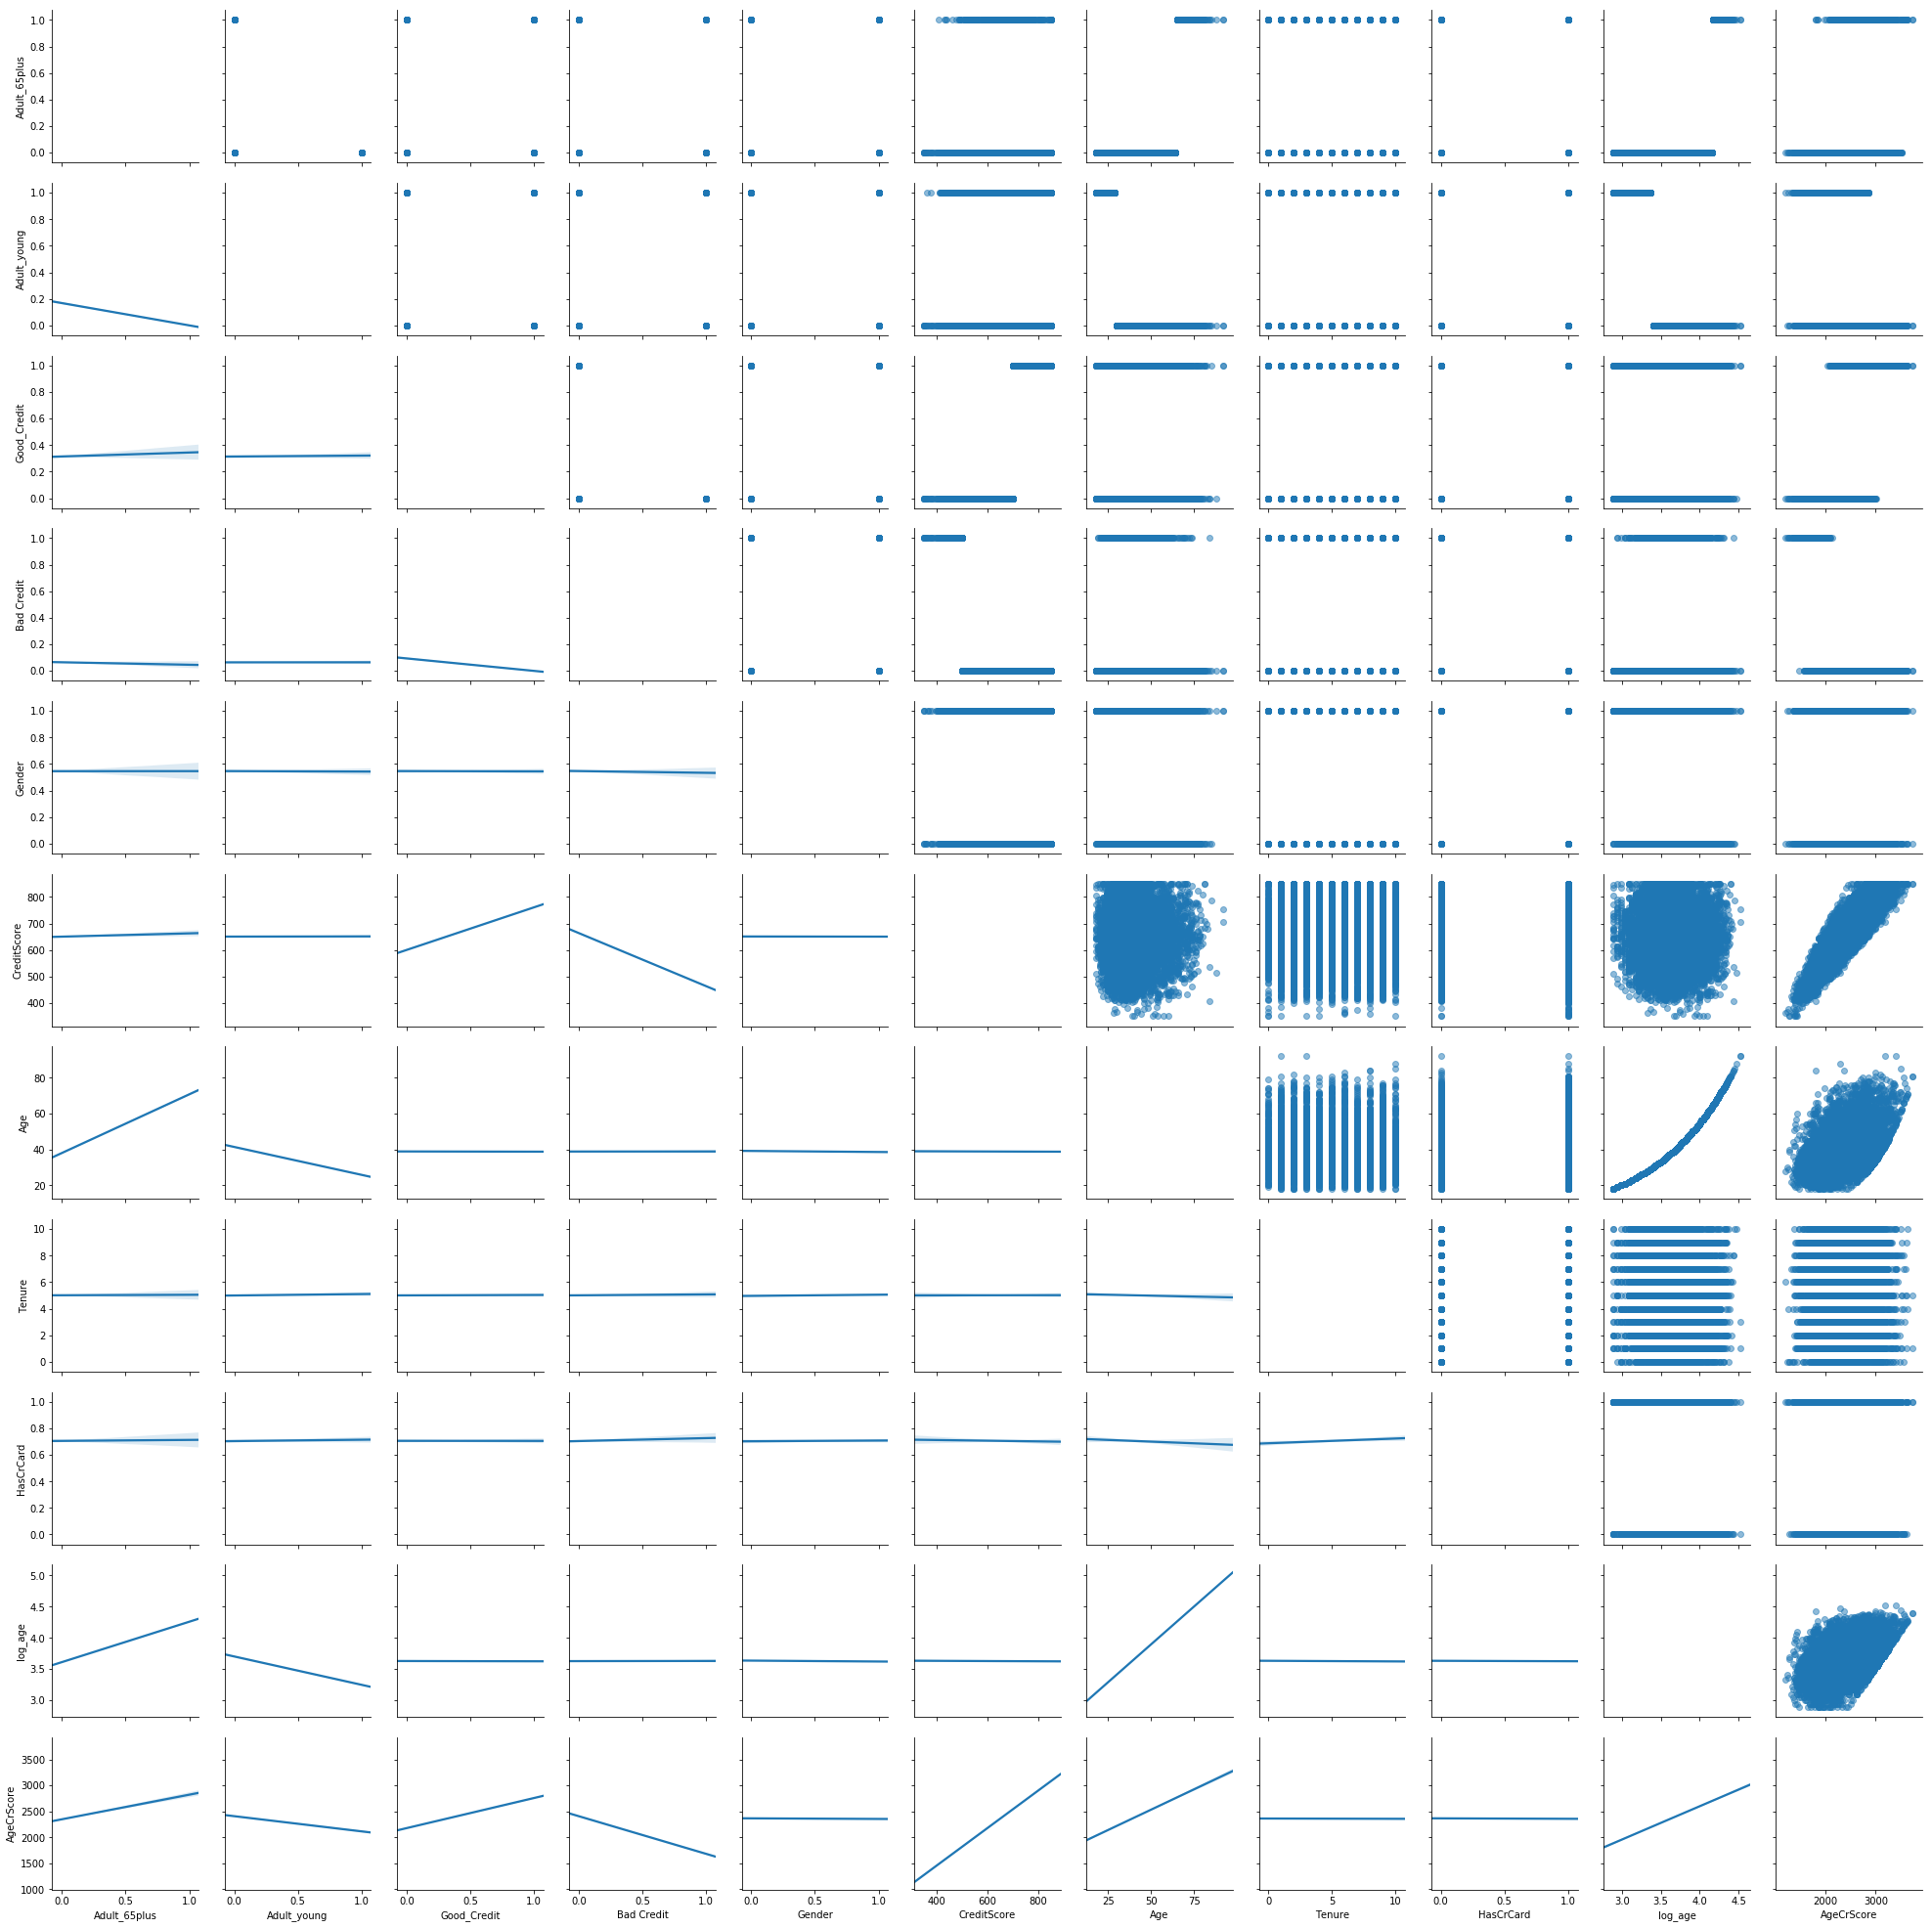

In [16]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(plot, diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
plt.show()

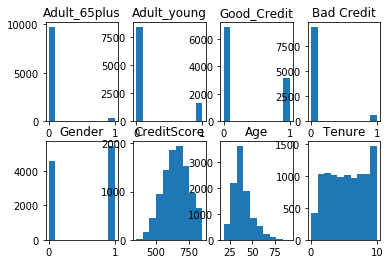

In [23]:
# Making a eight-panel plot.
fig = plt.figure()
i = 240
for feature in plot:
    i += 1
    fig.add_subplot(i)
    plt.hist(features[feature])
    plt.title(feature)
    if i == 248:
        break

In [34]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm

y = DataSet['Exited']
X_opt = features
X_opt = X_opt.drop('Spain', axis = 1)

In [27]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:06:01   Log-Likelihood:                -4224.3
No. Observations:               10000   AIC:                             8477.
Df Residuals:                    9986   BIC:                             8578.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
France          -0.7772      0.515     -1.510      0.131      -1.786       0.232
Germany         -0.6359      0.515     -1.235      0.217      -1.645       0.374
Spain           -0.7761      0.515     -1.508      0.132      -1.785       0.233
Adult_65plus    -0.6093      0.033    -18.293      0.000      -0.675      -0.544
Adult_young      0.1039      0.017      5.982      0.000       0.070       0.138
Good_Credit      0.0221      0.014      1.635      0.102      -0.004       0.049
Bad Credit      -0.0018      0.019     -0.097      0.923      -0.039       0.035
Gender          -0.0727      0.007     -9.785      0.000      -0.087      -0.058
CreditScore      0.0004      0.001      0.818      0.414      -0.001       0.002
Age              0.0175      0.003      5.489      0.000       0.011       0.024
Tenure          -0.0012      0.001     -0.960      0.337      -0.004       0.001
HasCrCard       -0.0027      0.008     -0.328      0.743      -0.019       0.013
log_age          0.1150      0.167      0.690      0.490      -0.212       0.442
AgeCrScore      -0.0002      0.000     -1.146      0.252      -0.000       0.000
==============================================================================
Omnibus:                     1522.501   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.900
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       3.401   Cond. No.                     6.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_opt = X_opt.drop('Bad Credit', axis = 1)

In [36]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     411.4
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:10:30   Log-Likelihood:                -4225.5
No. Observations:               10000   AIC:                             8475.
Df Residuals:                    9988   BIC:                             8561.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
France          -0.0012      0.009     -0.135      0.892      -0.019       0.017
Germany          0.1403      0.010     13.394      0.000       0.120       0.161
Adult_65plus    -0.6306      0.030    -20.889      0.000      -0.690      -0.571
Adult_young      0.0903      0.015      6.077      0.000       0.061       0.119
Good_Credit      0.0227      0.012      1.825      0.068      -0.002       0.047
Gender          -0.0729      0.007     -9.807      0.000      -0.087      -0.058
CreditScore     -0.0001      0.000     -0.341      0.733      -0.001       0.001
Age              0.0209      0.002      9.303      0.000       0.017       0.025
Tenure          -0.0012      0.001     -0.977      0.328      -0.004       0.001
HasCrCard       -0.0027      0.008     -0.334      0.739      -0.019       0.013
log_age         -0.1343      0.027     -5.013      0.000      -0.187      -0.082
AgeCrScore   -1.217e-05      0.000     -0.115      0.909      -0.000       0.000
==============================================================================
Omnibus:                     1526.801   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2323.188
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.411   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X_opt = X_opt.drop('HasCrCard', axis = 1)
X_opt = X_opt.drop('Age', axis = 1)
X_opt = X_opt.drop('CreditScore', axis = 1)

In [38]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:10:31   Log-Likelihood:                -4680.3
No. Observations:               10000   AIC:                             9379.
Df Residuals:                    9991   BIC:                             9444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
France          -0.0255      0.009     -2.700      0.007      -0.044      -0.007
Germany          0.1296      0.011     11.833      0.000       0.108       0.151
Adult_65plus    -0.1273      0.024     -5.390      0.000      -0.174      -0.081
Adult_young     -0.1235      0.010    -11.907      0.000      -0.144      -0.103
Good_Credit      0.0071      0.013      0.550      0.582      -0.018       0.033
Gender          -0.0934      0.008    -12.061      0.000      -0.109      -0.078
Tenure          -0.0045      0.001     -3.380      0.001      -0.007      -0.002
log_age          0.1037      0.011      9.595      0.000       0.083       0.125
AgeCrScore   -3.894e-05   1.72e-05     -2.269      0.023   -7.26e-05   -5.31e-06
==============================================================================
Omnibus:                     1772.721   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.806
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       3.134   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_opt = X_opt.drop('Tenure', axis = 1)

In [40]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     453.2
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:10:40   Log-Likelihood:                -4686.0
No. Observations:               10000   AIC:                             9388.
Df Residuals:                    9992   BIC:                             9446.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
France          -0.0256      0.009     -2.710      0.007      -0.044      -0.007
Germany          0.1296      0.011     11.825      0.000       0.108       0.151
Adult_65plus    -0.1242      0.024     -5.259      0.000      -0.171      -0.078
Adult_young     -0.1266      0.010    -12.251      0.000      -0.147      -0.106
Good_Credit      0.0067      0.013      0.517      0.605      -0.019       0.032
Gender          -0.0939      0.008    -12.133      0.000      -0.109      -0.079
log_age          0.0975      0.011      9.151      0.000       0.077       0.118
AgeCrScore   -3.861e-05   1.72e-05     -2.249      0.025   -7.23e-05   -4.95e-06
==============================================================================
Omnibus:                     1776.620   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2931.463
Skew:                           1.325   Prob(JB):                         0.00
Kurtosis:                       3.133   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
X_opt = X_opt.drop('Good_Credit', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     517.9
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:11:08   Log-Likelihood:                -4686.2
No. Observations:               10000   AIC:                             9386.
Df Residuals:                    9993   BIC:                             9437.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
France          -0.0256      0.009     -2.702      0.007      -0.044      -0.007
Germany          0.1297      0.011     11.834      0.000       0.108       0.151
Adult_65plus    -0.1247      0.024     -5.283      0.000      -0.171      -0.078
Adult_young     -0.1263      0.010    -12.241      0.000      -0.147      -0.106
Gender          -0.0939      0.008    -12.131      0.000      -0.109      -0.079
log_age          0.0936      0.008     12.377      0.000       0.079       0.108
AgeCrScore   -3.179e-05    1.1e-05     -2.890      0.004   -5.33e-05   -1.02e-05
==============================================================================
Omnibus:                     1776.464   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2931.120
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       3.132   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
print(X_opt.columns)

Index(['France', 'Germany', 'Adult_65plus', 'Adult_young', 'Gender', 'log_age',
       'AgeCrScore'],
      dtype='object')


# These are the features of interest.